In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, roc_auc_score
from sklearn.metrics import recall_score, f1_score, precision_score, matthews_corrcoef, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, Perceptron, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

d:\GitHub\SooTech\.venv\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
# Load and preprocess the dataset
titanic = pd.read_csv("./sample_data/train.csv")
titanic = titanic.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis=1)
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])
X = titanic.drop(["Survived"], axis=1)
y = titanic["Survived"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)
# Encode categorical variables
encoder = ce.OrdinalEncoder(["Sex", "Embarked"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
# Define models
models = {
"Logistic Regression": LogisticRegression(),
"Random Forest": RandomForestClassifier(criterion="entropy", n_estimators=100),
"LightGBM": lgb.LGBMClassifier(),
"Ridge Classifier CV": RidgeClassifierCV(),
"XGBoost": XGBClassifier(),
"Nearest Centroid": NearestCentroid(),
"Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
"Calibrated Classifier CV": CalibratedClassifierCV(),
"Bernoulli NB": BernoulliNB(),
"Bagging Classifier": BaggingClassifier(),
"SVC": SVC(),
"Linear SVC": LinearSVC(),
"KNeighbors Classifier": KNeighborsClassifier(),
"Gaussian NB": GaussianNB(),
"Perceptron": Perceptron(),
"SGD Classifier": SGDClassifier(),
"Decision Tree": DecisionTreeClassifier(),
"MLP Classifier": MLPClassifier(),
"Extra Trees": ExtraTreesClassifier(),
"AdaBoost": AdaBoostClassifier(),
"Nu SVC": NuSVC(),
"Gaussian Process": GaussianProcessClassifier(kernel=RBF()),
"Ridge Classifier": RidgeClassifier(),
"Passive Aggressive": PassiveAggressiveClassifier(),
"Hist Gradient Boosting": HistGradientBoostingClassifier()
}

In [9]:
# Train and predict
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate metrics
    CM = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = CM.ravel()
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mathew = matthews_corrcoef(y_test, y_pred)
    results.append([name, acc, balanced_acc, prec, rec, specificity, f1, roc, loss_log, mathew])
    model_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Balanced Accuracy", "Precision", "Recall", "Sensitivity", "F1 Score", "ROC", "Log Loss", "Mathew"])
    model_results = model_results.sort_values("F1 Score", ascending=False).reset_index(drop=True)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [10]:
model_results

,Model,Accuracy,Balanced Accuracy,Precision,Recall,Sensitivity,F1 Score,ROC,Log Loss,Mathew
0,Extra Trees,0.832402,0.823230,0.814286,0.770270,0.876190,0.791667,0.823230,6.040836,0.652365
1,XGBoost,0.832402,0.821236,0.823529,0.756757,0.885714,0.788732,0.821236,6.040836,0.651851
2,Random Forest,0.832402,0.817246,0.843750,0.729730,0.904762,0.782609,0.817246,6.040836,0.651925
3,Bagging Classifier,0.821229,0.807722,0.818182,0.729730,0.885714,0.771429,0.807722,6.443558,0.628185
4,LightGBM,0.821229,0.807722,0.818182,0.729730,0.885714,0.771429,0.807722,6.443558,0.628185
5,Gaussian NB,0.815642,0.802960,0.805970,0.729730,0.876190,0.765957,0.802960,6.644919,0.616566
6,MLP Classifier,0.815642,0.802960,0.805970,0.729730,0.876190,0.765957,0.802960,6.644919,0.616566
7,Calibrated Classifier CV,0.815642,0.800965,0.815385,0.716216,0.885714,0.762590,0.800965,6.644919,0.616379
8,Linear SVC,0.815642,0.800965,0.815385,0.716216,0.885714,0.762590,0.800965,6.644919,0.616379
9,Hist Gradient Boosting,0.810056,0.798198,0.794118,0.729730,0.866667,0.760563,0.798198,6.846281,0.605103


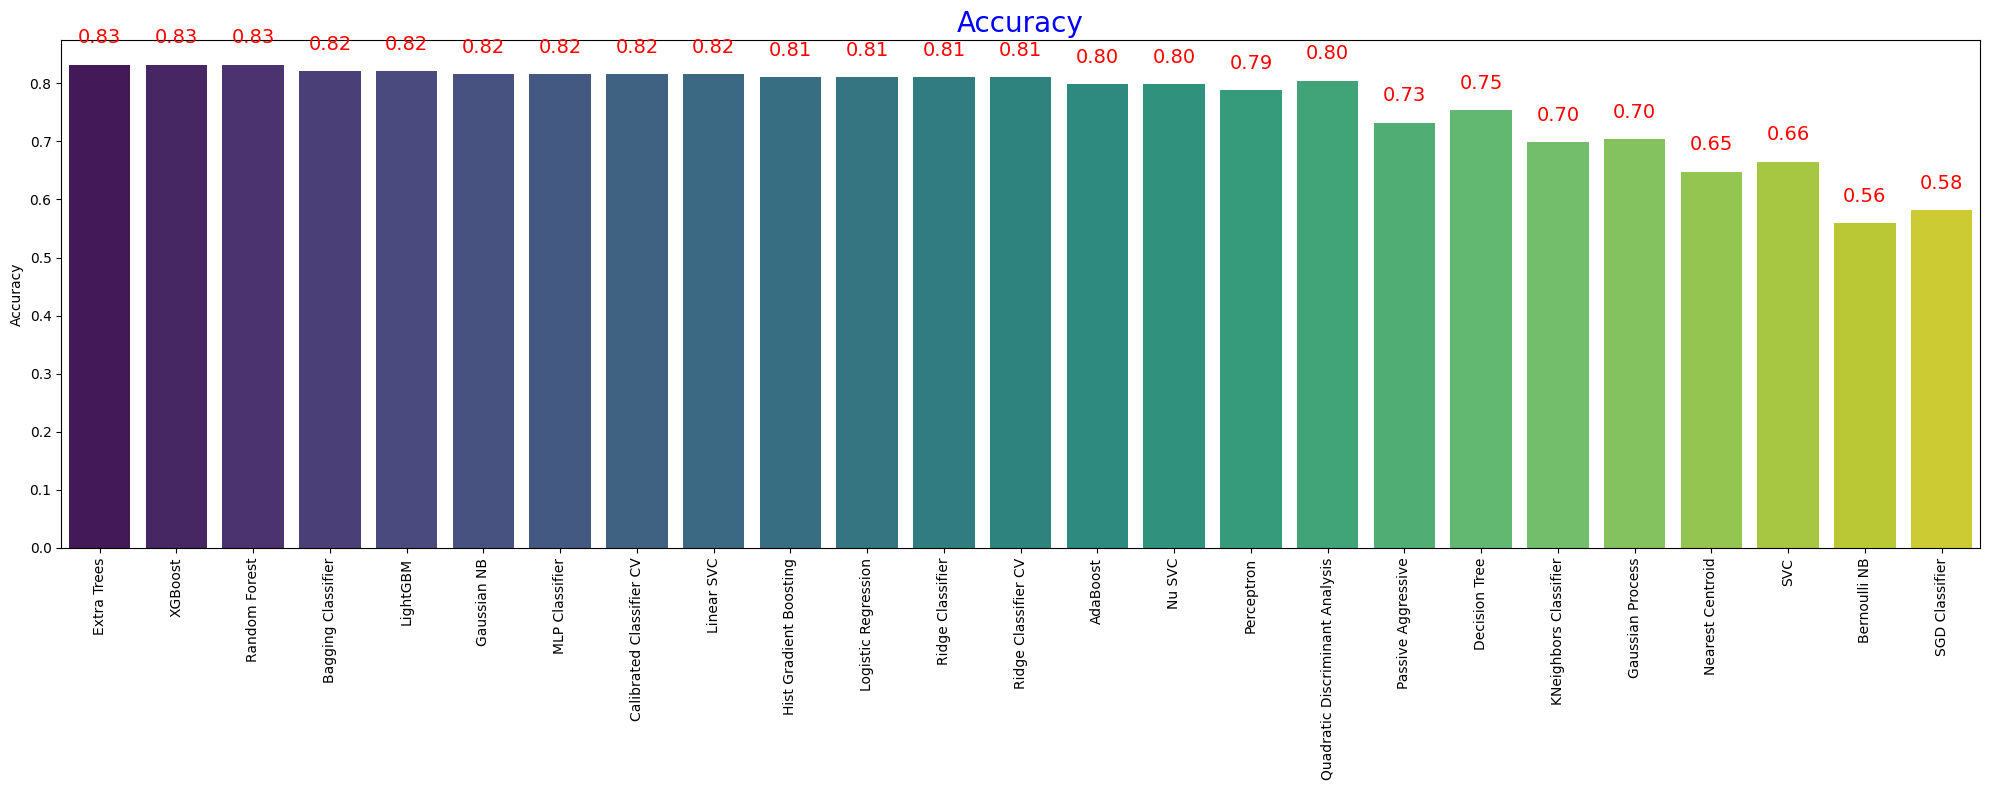

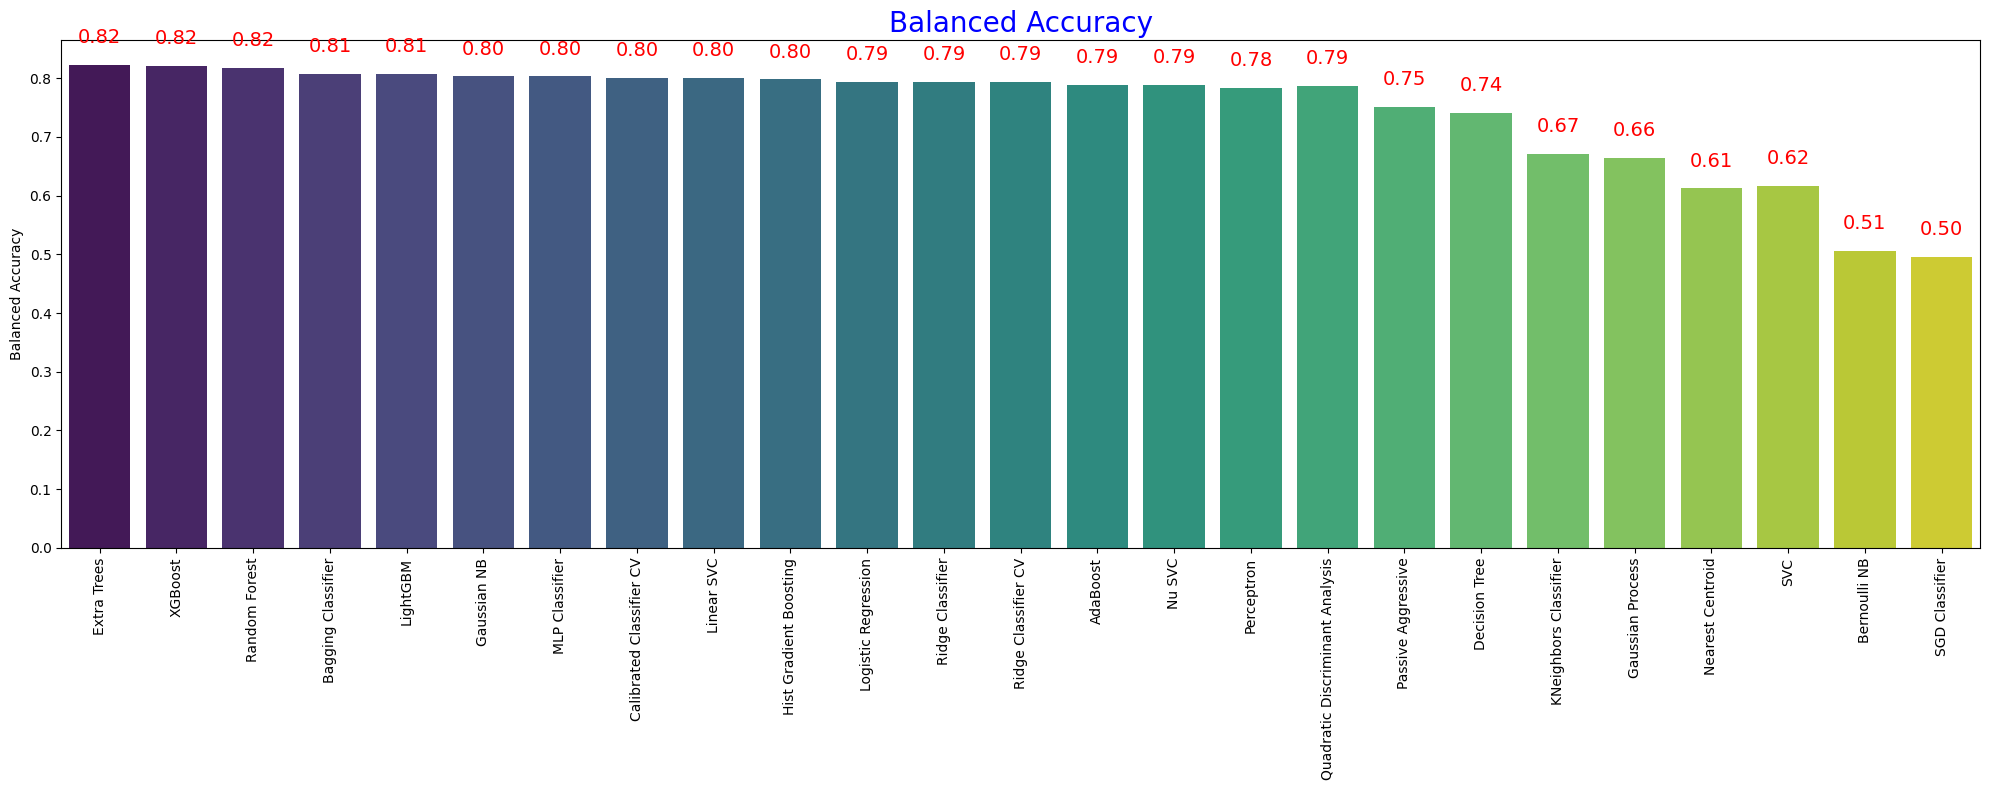

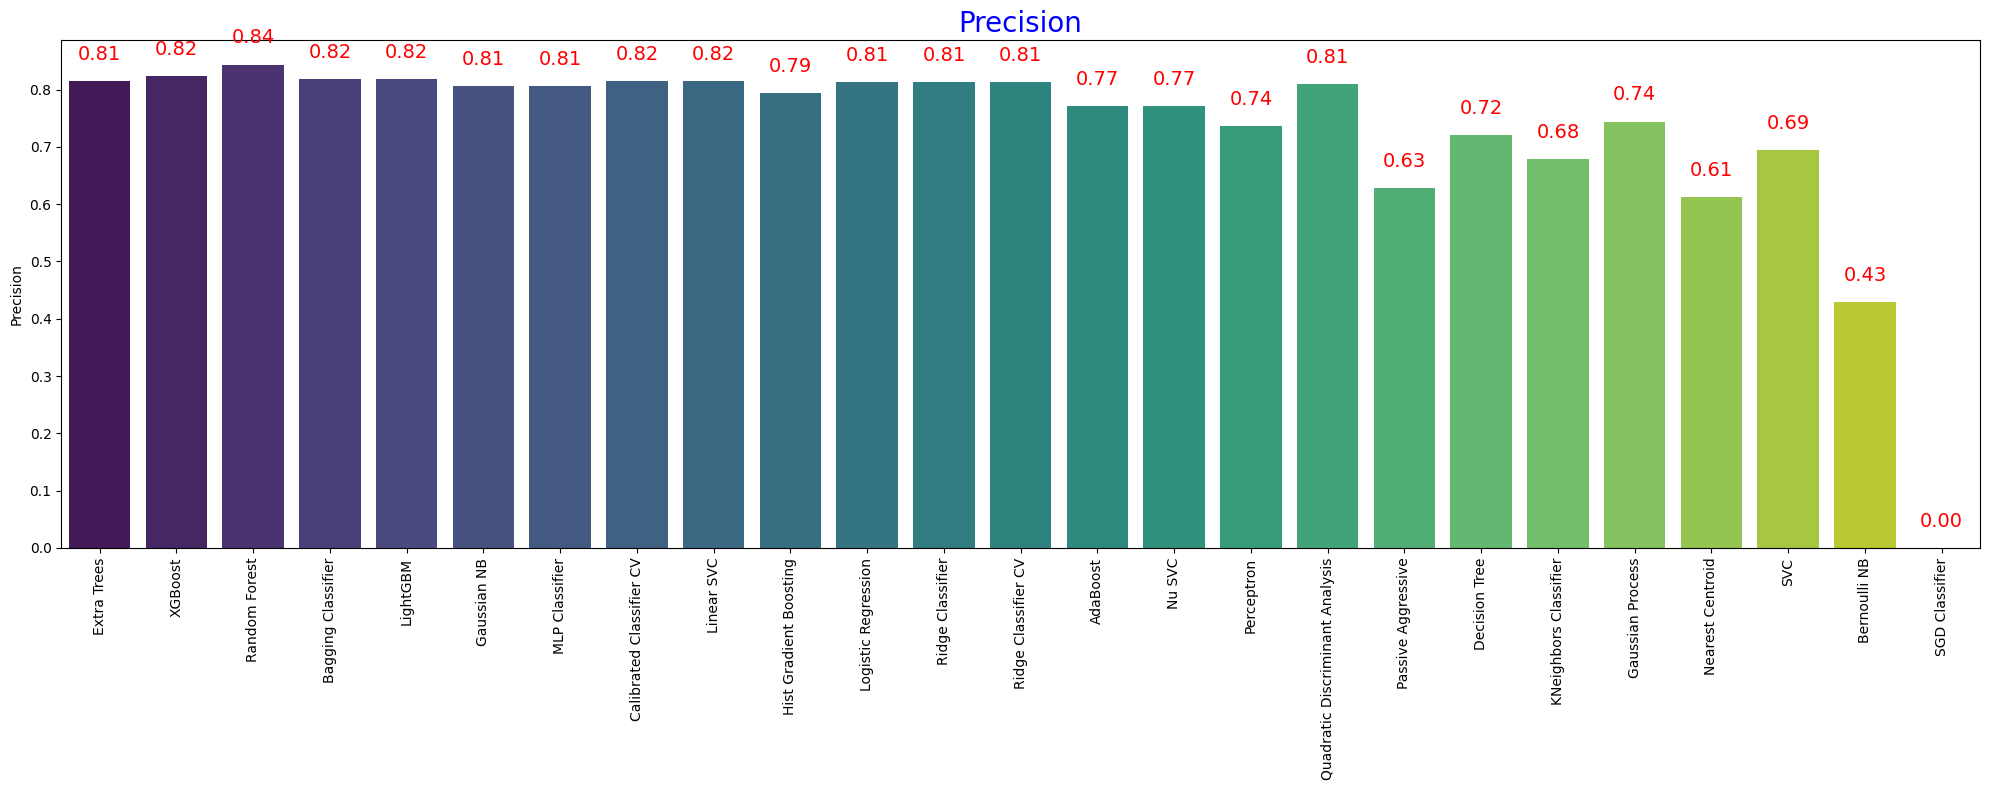

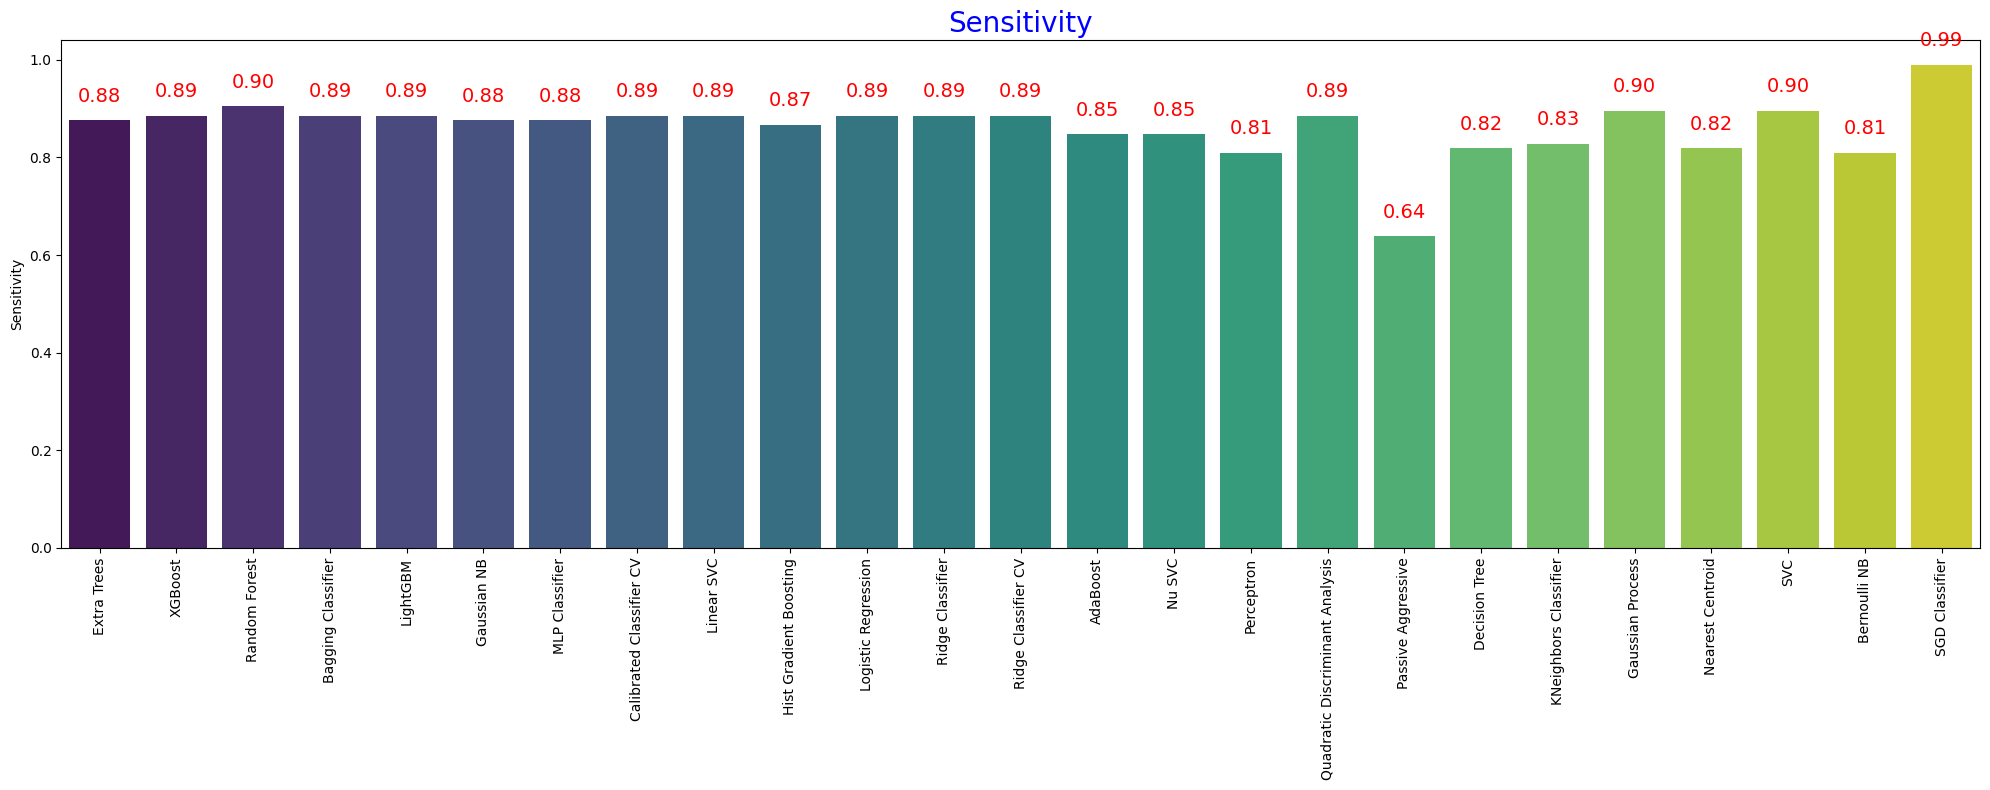

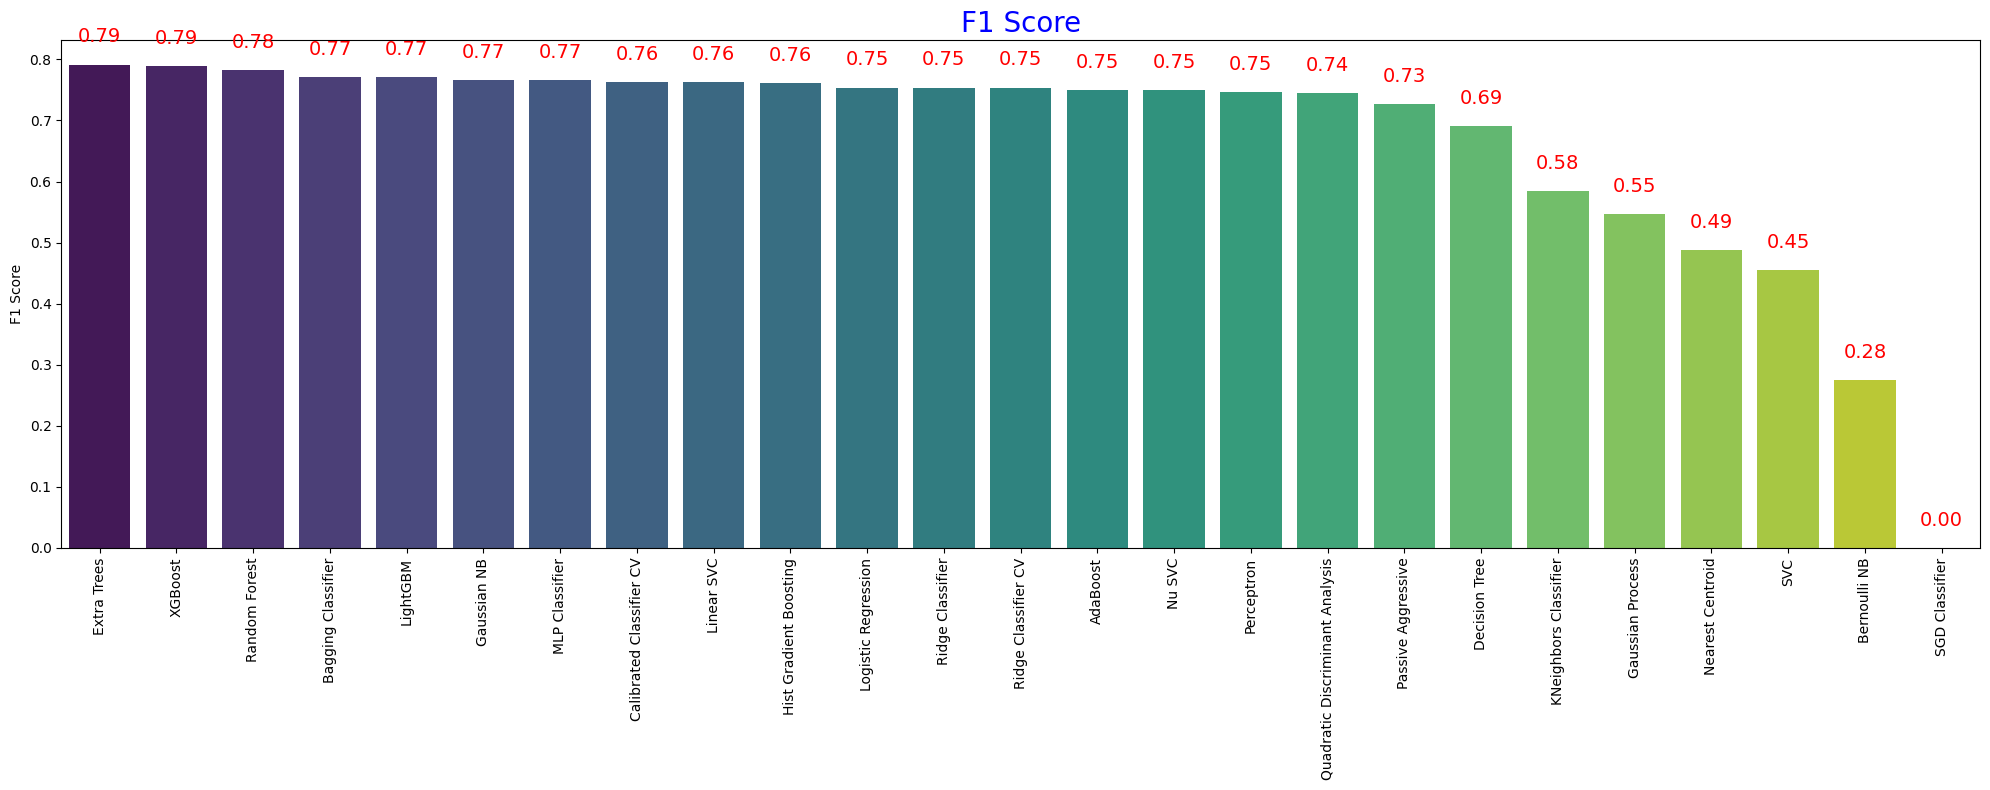

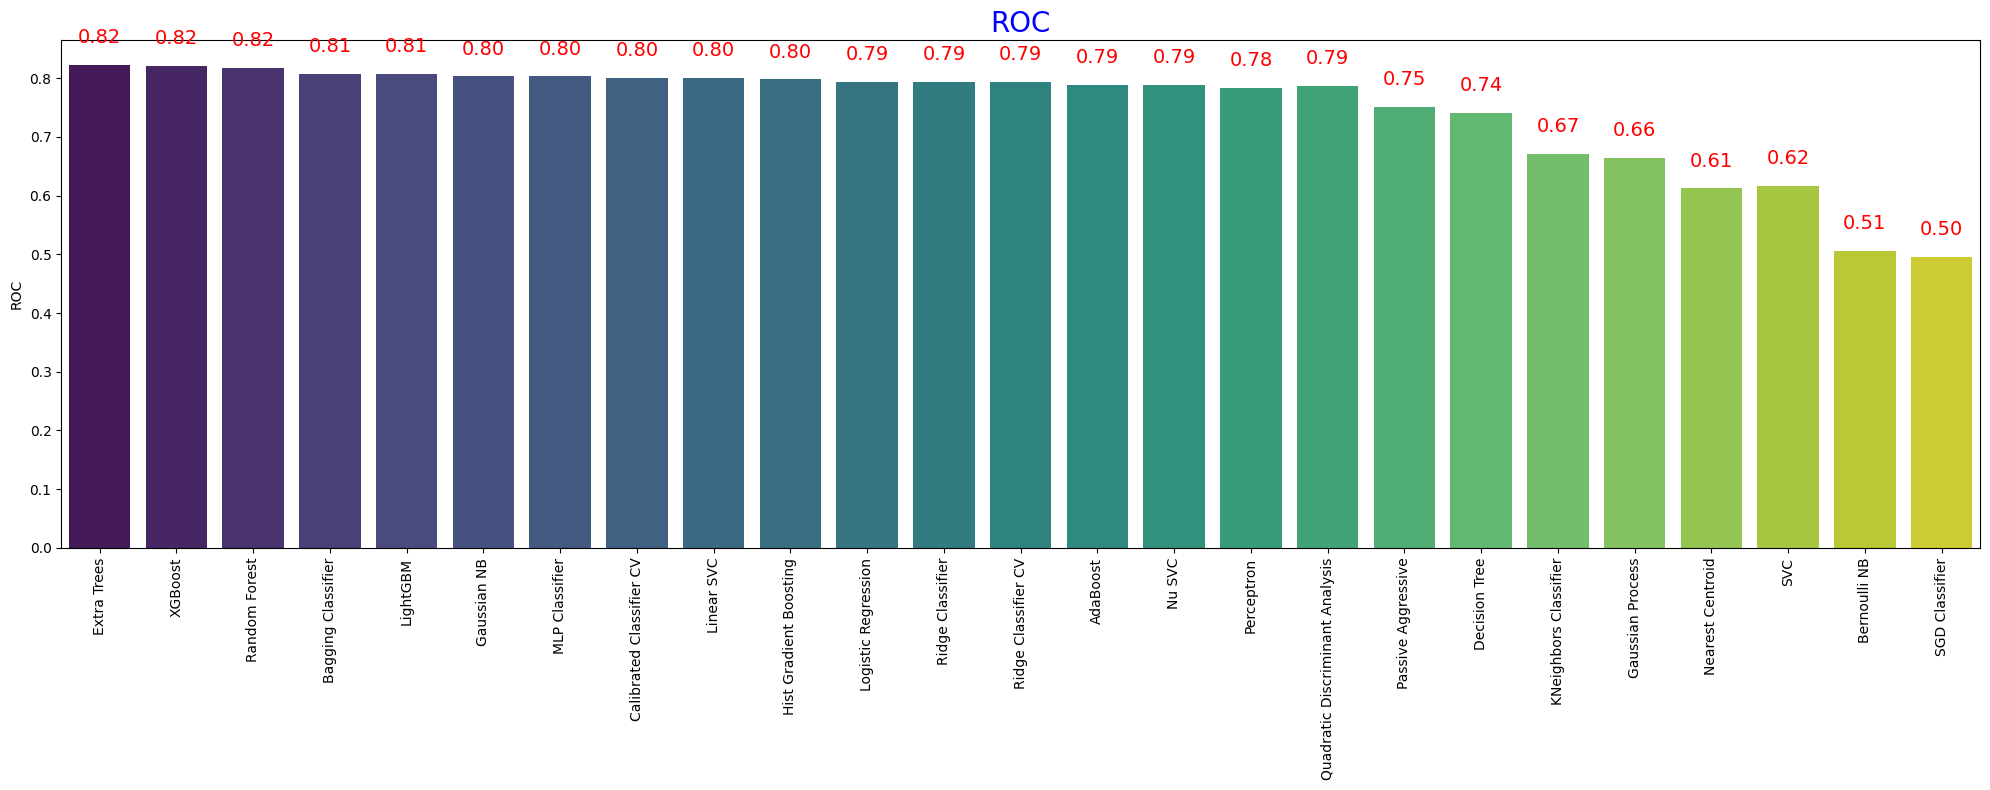

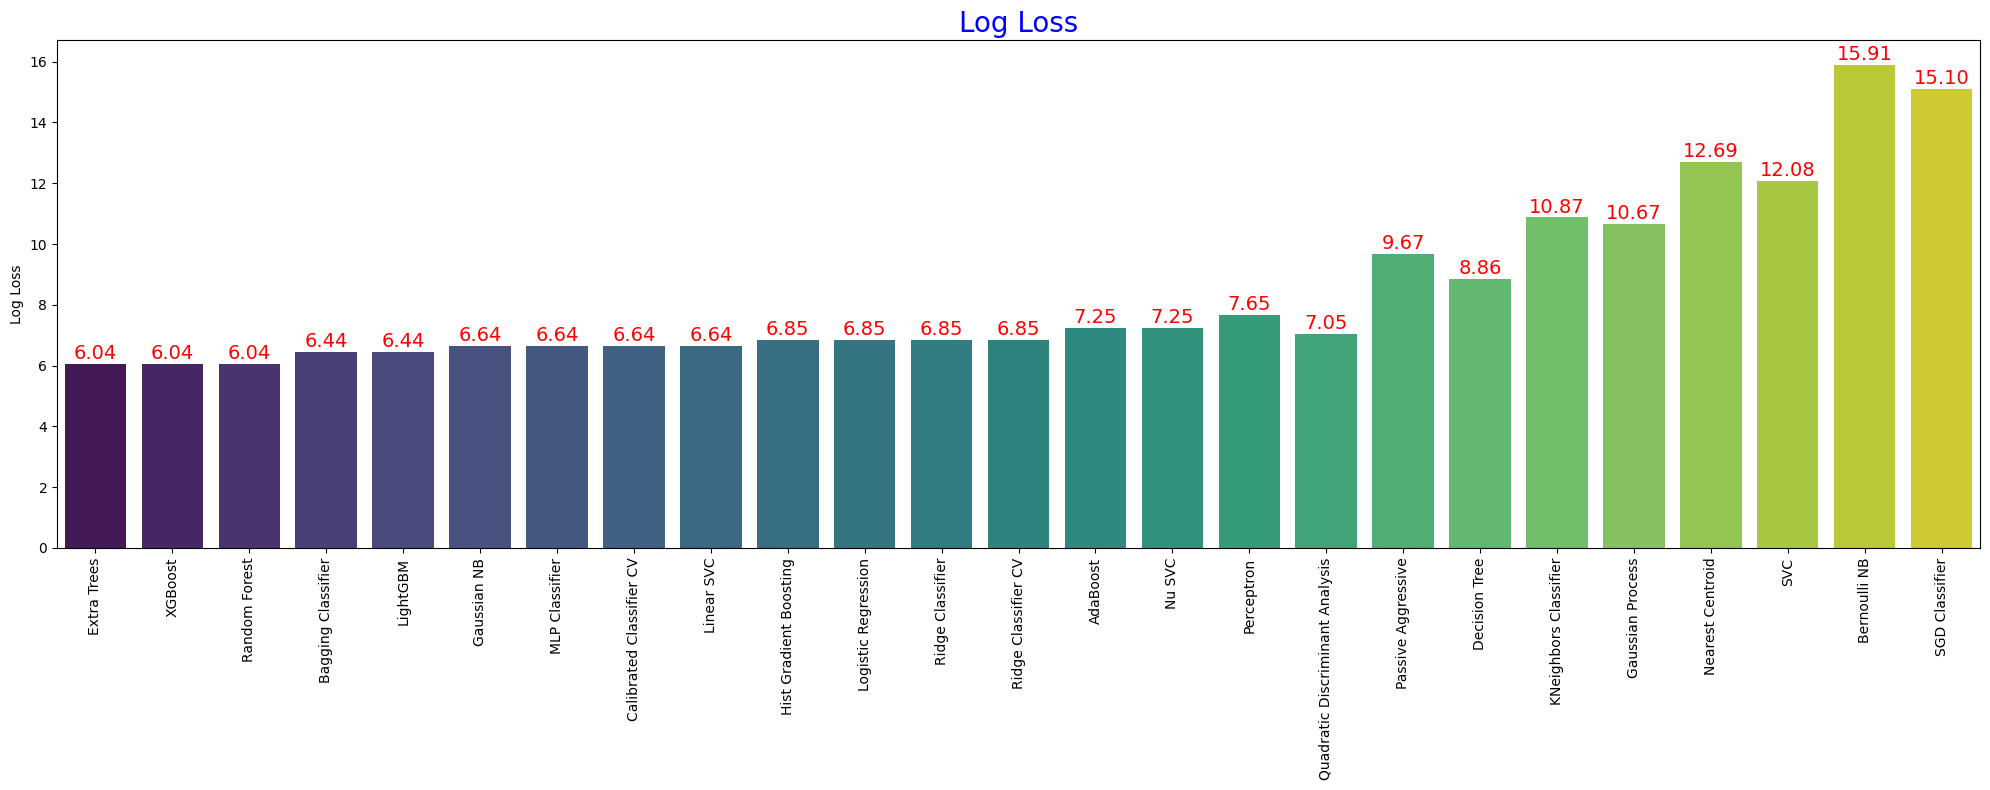

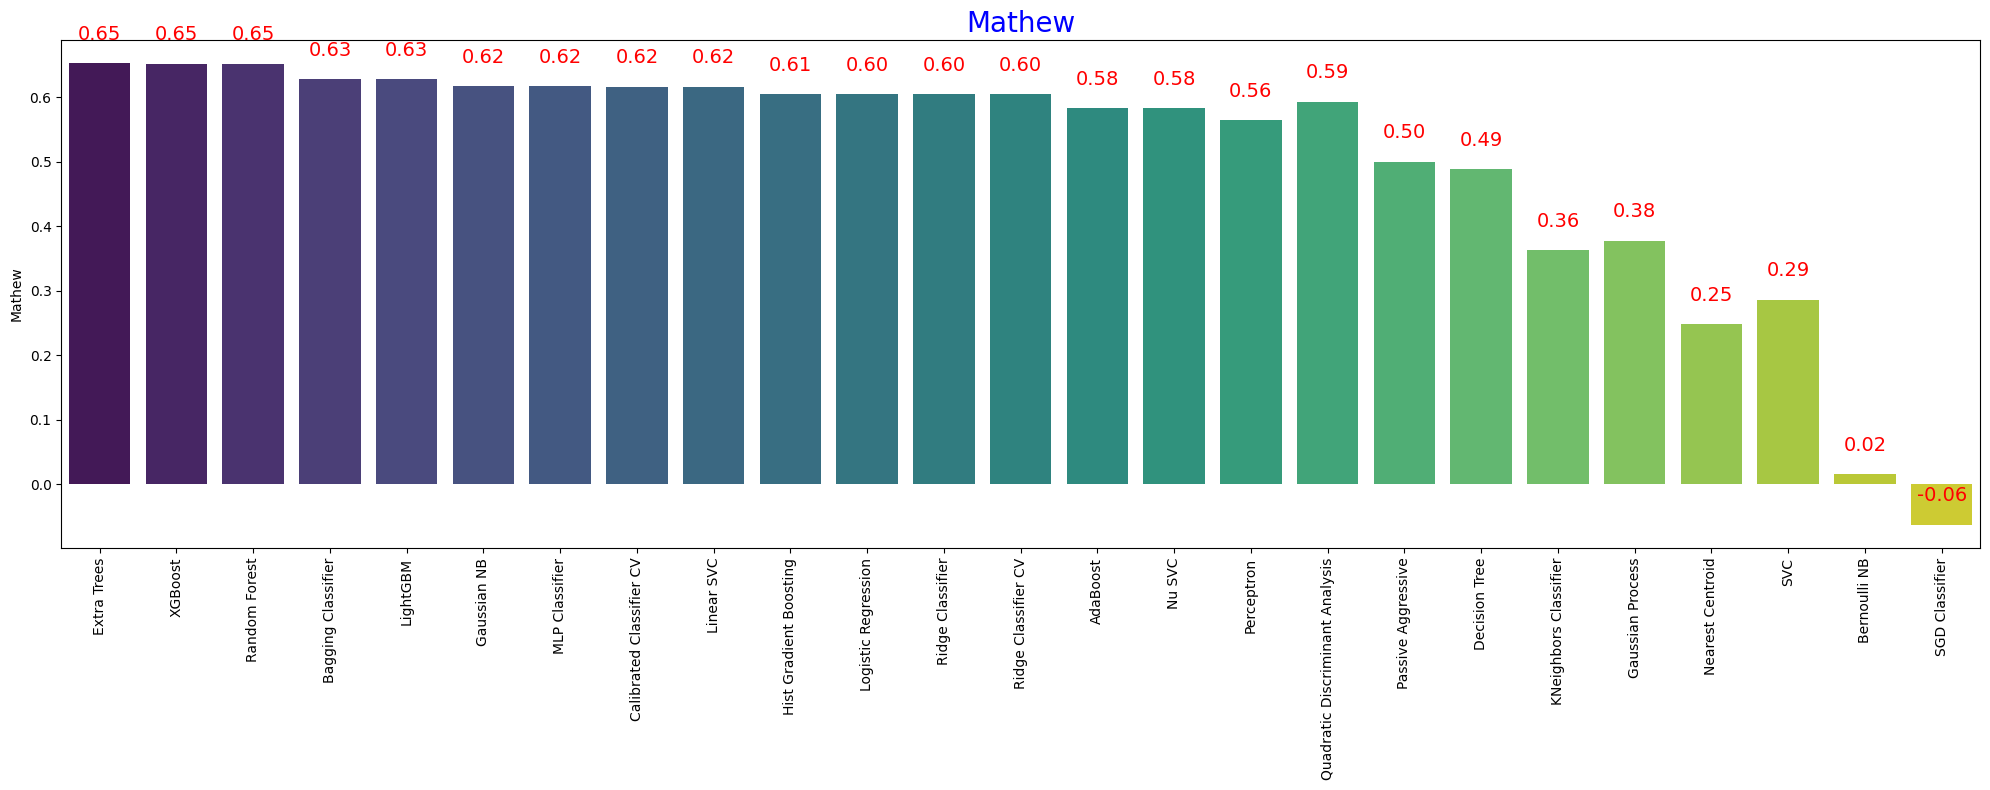

In [12]:
# List of metrics to plot
metrics = [
'Accuracy', # Assuming this is the column for model accuracy
'Balanced Accuracy',
'Precision',
'Sensitivity',
'F1 Score',
'ROC',
'Log Loss',
'Mathew'
]
# Loop through each metric and create a separate plot
for metric in metrics:
    # Create a new figure for each plot
    fig, ax = plt.subplots(figsize=(20, 8)) # Adjust figure size as needed
    # Create bar plot with Seaborn
    sns.barplot(x="Model", y=metric, data=model_results, palette="viridis", ax=ax)
    # Extract bar values (assuming a numerical column for metric values)
    bar_values = model_results[metric]
    # Add value annotations above each bar
    for i, (model, value) in enumerate(zip(model_results["Model"], bar_values)):
        ax.text(i, value + 0.03, f"{value:.2f}", ha='center', va='bottom', fontsize=14, color='red')

    # Set title and labels with increased font size and space before the plot
    ax.set_title(f"{metric}", fontsize=20, color='Blue')
    ax.set_xlabel("")
    ax.set_ylabel(f"{metric}")
    # Increase space above the plot using `top` prop in `plt.subplots_adjust`
    plt.subplots_adjust(top=0.95) # Adjust value as needed
    # Rotate x-axis labels if many models
    if len(model_results["Model"]) > 5:
        ax.set_xticklabels(model_results["Model"], rotation=90)

    # Adjust spacing within the plot
    plt.tight_layout()
# Show all plots at once
plt.show()